# Indonesian Hate Speech Classification

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set(style='darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load Dataset

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/learn_monday/text_preprocessing/IDHSD_RIO_unbalanced_713_2017.txt', encoding='cp1252', sep='\t', header=None, names=['label', 'tweet'], skiprows=1, engine='python')
data

,label,tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


## Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   713 non-null    object
 1   tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [5]:
data.describe()

,label,tweet
count,713,713
unique,2,703
top,Non_HS,pertunjukan yang sangat membuat saya serius da...
freq,453,2


In [6]:
data.groupby('label').describe()

tweet                                                               
       count unique                                                top freq
label                                                                      
HS       260    259  Sini lu, kami enggak mau kampung kami didatang...    2
Non_HS   453    444  Kenapa debat @MataNajwa ini, Ahok makin keliat...    2

In [7]:
data['length'] = data['tweet'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dd3631810>,
      dtype=object)

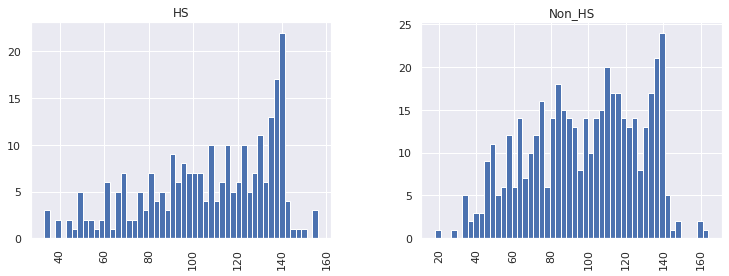

In [8]:
data.hist(column = 'length',
          by = 'label',
          bins = 50,
          figsize = (12,4))

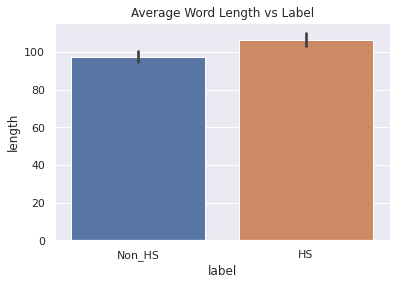

In [9]:
fig1 = sns.barplot(x = 'label',
                   y = 'length',
                   data = data)
plt.title('Average Word Length vs Label')
plot = fig1.get_figure()

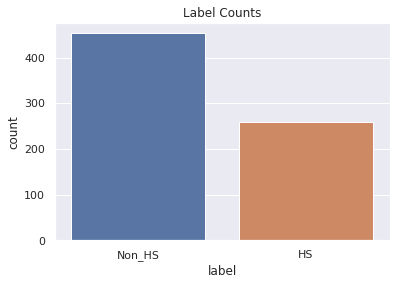

In [10]:
fig2 = sns.countplot(x= 'label',
                     data = data)
plt.title('Label Counts')
plot = fig2.get_figure()

Jumlah tweet yang termasuk kategori Non-Hate Speech lebih banyak daripada yang masuk ke dalam kategori Hate Speech.

## Text Preprocessing

### 1. Over-Sampling Minority Class

In [11]:
count_class_NONHS, count_class_HS = data.label.value_counts()

In [12]:
count_class_NONHS

453

In [13]:
count_class_HS

260

In [14]:
data_class_NONHS = data[data['label'] == 'Non_HS']
data_class_HS = data[data['label'] == 'HS']

In [15]:
data_class_NONHS

,label,tweet,length
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79
...,...,...,...
448,Non_HS,Dalam nama Tuhan Untuk jakarta yg lebih baik,44
449,Non_HS,semagat buat pak Anies semoga selalu dalam rah...,59
450,Non_HS,semua warga DKI gunakan hak pilihmu....jangan ...,102
451,Non_HS,semoga Tuhan memberikan seluruh masyarakat DKI...,107


In [16]:
data_class_HS

,label,tweet,length
453,HS,"Ini pasti salah Jokowi, Ahok dan kafir-kafir a...",78
454,HS,@fahmiabuazzam1 biar aja biar tai nya kena bap...,138
455,HS,RT @BungWinar: Angin memporakporandakan basis ...,124
456,HS,"RT @Lupuz0503: Prestasi Ahok, \nSelain mjadi m...",131
457,HS,Ulama Kompak Nyatakan #HaramPemimpinKafir Pili...,62
...,...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,62
709,HS,"Betul bang hancurkan merka bang, musnahkan chi...",107
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...",139
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...",137


In [17]:
# Oversampling data HS
data_class_HS_over = data_class_HS.sample(count_class_NONHS,
                                          replace = True)
data_test_over = pd.concat([data_class_NONHS,
                            data_class_HS_over], axis = 0)

print('Random over-sampling:')
print(data_test_over.label.value_counts())

Random over-sampling:
Non_HS    453
HS        453
Name: label, dtype: int64


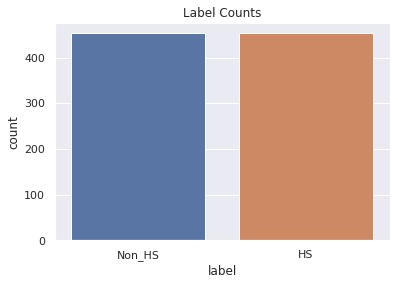

In [18]:
fig3 = sns.countplot(x = 'label',
                     data = data_test_over)
plt.title('Label Counts')
plot = fig3.get_figure()

In [19]:
data_test_over.groupby('label').describe()

length                                                        
        count        mean        std   min   25%    50%    75%    max
label                                                                
HS      453.0  104.814570  29.440521  33.0  86.0  108.0  131.0  156.0
Non_HS  453.0   97.494481  29.750780  18.0  75.0  100.0  122.0  164.0

### 2. Tokenizing, Filtering, Stopwords, Stemming

In [20]:
! pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 28.5 MB/s 


In [21]:
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Pipeline:

In [29]:
def text_preprocessing(tweet):

    # TOKENIZING
    # Generate word lists and remove punctuation
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words.lower())
    new_tweet = form_sentence(tweet)


    # FILTERING
    # Remove stopwords and words with unusual symbols
    # Convert words to lowercase
    def no_user_alpha(tweet):
        tweet_list = [element for element in tweet.split() if element != '@']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('indonesian')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)

    # STEMMING
    # Find basic indonesian words from tweet
    def normalization(tweet_list):
        normalized_tweet = []
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        for word in tweet_list:
            normalized_text = stemmer.stem(word)
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [30]:
data_test_over['tweet_list'] = data_test_over['tweet'].apply(text_preprocessing)

In [31]:
data_test_over

,label,tweet,length,tweet_list
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,"[rt, spardaxyz, fadli, zon, mendagri, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,"[rt, baguscondromowo, luka, aksi, rangka, penj..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,"[sylvi, gurbernur, keras, perempuan, bukti, fo..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,"[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,"[rt, waspada, ktp, palsu, kawal, pilkada, https]"
...,...,...,...,...
595,HS,Penista Agama menjadi Santri Kehormatan.Yang k...,140,"[nista, agama, santri, kasih, ahok, otak, pulk..."
595,HS,Penista Agama menjadi Santri Kehormatan.Yang k...,140,"[nista, agama, santri, kasih, ahok, otak, pulk..."
539,HS,"Jangankan Banjir, Tuhan aja Dilawan Sama Ahok ...",112,"[banjir, tuhan, aja, lawan, ahok, jakartabanji..."
514,HS,pertanyaan dari Bu Sylvi gak mutu amat. #Debat...,61,"[bu, sylvi, gak, mutu, debatfinalpilkadajkt]"


## Split Data (Training and Test)

In [40]:
X = data_test_over['tweet']
y = data_test_over['label']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

### 1. Random Forest

In [43]:
pipeline_rnf = Pipeline([
    ('bow', CountVectorizer(analyzer = text_preprocessing)),
    ('tfidf', TfidfTransformer()), #weighted by TF-IDF score
    ('classifier', RandomForestClassifier(n_estimators = 100)),
])

pipeline_rnf.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x7f5db6ebc680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

### 2. Multinomial Naive Bayes

In [47]:
pipeline_mnb = Pipeline([
    ('bow', CountVectorizer(analyzer = text_preprocessing)),
    ('tfidf', TfidfTransformer()), #weighted by TF-IDF score
    ('classifier', MultinomialNB()),
])
pipeline_mnb.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x7f5db6ebc680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### 3. KNN

In [49]:
pipeline_knn = Pipeline([
    ('bow', CountVectorizer(analyzer = text_preprocessing)),
    ('tfidf', TfidfTransformer()), #weighted by TF-IDF score
    ('classifier', KNeighborsClassifier(n_neighbors=2)),
])
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x7f5db6ebc680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

## Evaluation Model

In [45]:
from sklearn import metrics

### 1. The results of Random Forest Model

In [46]:
predictions_rnf = pipeline_rnf.predict(X_test)

print("==== Random Forest ====")
print(metrics.classification_report(predictions_rnf, y_test))
print('\n')
print(metrics.confusion_matrix(predictions_rnf, y_test))
print(metrics.accuracy_score(predictions_rnf, y_test))

==== Random Forest ====
              precision    recall  f1-score   support

          HS       0.97      0.90      0.93        94
      Non_HS       0.90      0.97      0.93        88

    accuracy                           0.93       182
   macro avg       0.94      0.94      0.93       182
weighted avg       0.94      0.93      0.93       182



[[85  9]
 [ 3 85]]
0.9340659340659341


### 2. The results of Multinomial Naive Bayes Model


In [48]:
predictions_mnb = pipeline_mnb.predict(X_test)

print("==== Multinomial Naive Bayes ====")
print(metrics.classification_report(predictions_mnb, y_test))
print('\n')
print(metrics.confusion_matrix(predictions_mnb, y_test))
print(metrics.accuracy_score(predictions_mnb, y_test))

==== Multinomial Naive Bayes ====
              precision    recall  f1-score   support

          HS       0.92      0.80      0.86       101
      Non_HS       0.79      0.91      0.85        81

    accuracy                           0.85       182
   macro avg       0.85      0.86      0.85       182
weighted avg       0.86      0.85      0.85       182



[[81 20]
 [ 7 74]]
0.8516483516483516


### 3. The results of KNN Model

In [50]:
predictions_knn = pipeline_knn.predict(X_test)

print("==== KNN ====")
print(metrics.classification_report(predictions_knn, y_test))
print('\n')
print(metrics.confusion_matrix(predictions_knn, y_test))
print(metrics.accuracy_score(predictions_knn, y_test))

==== KNN ====
              precision    recall  f1-score   support

          HS       0.93      0.75      0.83       110
      Non_HS       0.70      0.92      0.80        72

    accuracy                           0.81       182
   macro avg       0.82      0.83      0.81       182
weighted avg       0.84      0.81      0.82       182



[[82 28]
 [ 6 66]]
0.8131868131868132
